<a href="https://colab.research.google.com/github/alex-smith-uwec/AI_Spring2025/blob/main/Romania_assignment_change.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import heapq
import random

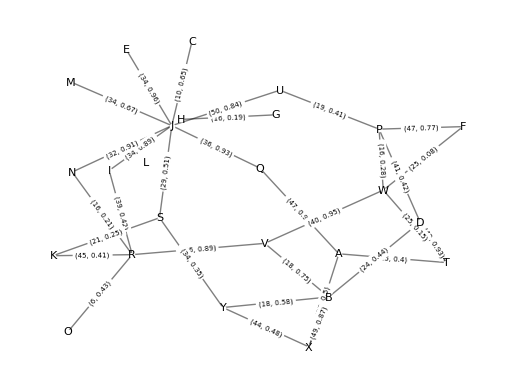

In [29]:


def generate_graph(num_nodes, edge_prob):
    graph = nx.Graph()
    # Generate labels A, B, C...
    nodes = [string.ascii_uppercase[i] for i in range(num_nodes)]
    graph.add_nodes_from(nodes)
    for i in range(num_nodes):
        for j in range(i + 1, num_nodes):
            if random.random() < edge_prob:
                distance = random.randint(5, 50)
                prob = round(random.uniform(0.05, 1), 2)
                graph.add_edge(nodes[i], nodes[j], label=(distance, prob)) # Store edge label as a tuple
    return graph


# Generate the graph with 25 nodes and edge probability of 0.15
graph = generate_graph(25, 0.15)


#Plot the graph
pos = nx.kamada_kawai_layout(graph) # positions for all nodes

# nodes
nx.draw_networkx_nodes(graph, pos, node_size=10, node_color="white")

# edges
nx.draw_networkx_edges(graph, pos, alpha=0.5)

# labels
nx.draw_networkx_labels(graph, pos, font_size=8)

# Add edge labels
edge_labels = nx.get_edge_attributes(graph, 'label')
nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels, font_size=5)

plt.axis("off")
plt.show()


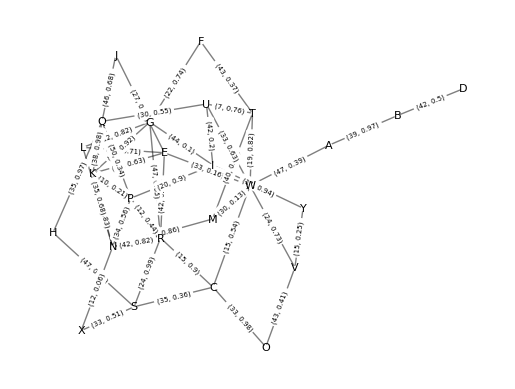

In [ ]:
# prompt: Treat the first entry of the tuple for the edges as a distance and give me code for uniform cost search from a starting city to a goal city.

def uniform_cost_search(graph, start, goal):
    """
    Performs uniform cost search on a graph.

    Args:
        graph: A networkx graph representing the map.
        start: The starting city.
        goal: The goal city.

    Returns:
        A tuple containing:
            - A list of cities representing the path from start to goal.
            - The total cost of the path.
        Returns (None, None) if no path is found.
    """

    frontier = [(0, start, [start])]  # (cost, current_node, path)
    explored = set()

    while frontier:
        cost, current_node, path = heapq.heappop(frontier)

        if current_node == goal:
            return path, cost

        explored.add(current_node)

        for neighbor, data in graph[current_node].items():
            if neighbor not in explored:
                new_cost = cost + data['weight'][0]
                new_path = path + [neighbor]
                heapq.heappush(frontier, (new_cost, neighbor, new_path))

    return None, None  # No path found


# Example usage (replace with your desired start and goal cities):
start_city = 'Arad'
goal_city = 'Bucharest'

path, cost = uniform_cost_search(graph, start_city, goal_city)

if path:
    print(f"Path from {start_city} to {goal_city}: {path}")
    print(f"Total cost: {cost}")
else:
    print(f"No path found from {start_city} to {goal_city}")


Path from Arad to Bucharest: ['Arad', 'Sibiu', 'Rimnicu Vilcea', 'Pitesti', 'Bucharest']
Total cost: 418


In [ ]:
# prompt: Treat the second entry of the tuple for the edges as a probability and give me code for uniform cost search from a starting city to a goal city. The cost of a path is the product of the probabilities. We want to maximize.




def uniform_cost_search(graph, start, goal):
    """
    Performs uniform cost search on a graph, maximizing the product of probabilities.

    Args:
        graph: A networkx graph.
        start: The starting city.
        goal: The goal city.

    Returns:
        A tuple containing:
            - A list of cities representing the path from start to goal.
            - The product of probabilities for the path.
        Returns (None, None) if no path is found.
    """

    frontier = [(-1, start, [start])]  # (probability product, current_node, path)
    explored = set()

    while frontier:
        probability_product, current_node, path = heapq.heappop(frontier)
        probability_product = -probability_product #negate to use min-heap for max probability

        if current_node == goal:
            return path, probability_product

        explored.add(current_node)

        for neighbor, data in graph[current_node].items():
            if neighbor not in explored:
                new_probability_product = probability_product * data['weight'][1]
                new_path = path + [neighbor]
                heapq.heappush(frontier, (-new_probability_product, neighbor, new_path))

    return None, None  # No path found


# Example usage
start_city = 'Arad'
goal_city = 'Bucharest'

path, probability_product = uniform_cost_search(graph, start_city, goal_city)

if path:
    print(f"Path from {start_city} to {goal_city}: {path}")
    print(f"Product of probabilities: {probability_product}")
else:
    print(f"No path found from {start_city} to {goal_city}")


Path from Arad to Bucharest: ['Arad', 'Sibiu', 'Rimnicu Vilcea', 'Pitesti', 'Bucharest']
Product of probabilities: 0.16089051999999998


In [ ]:
# prompt: let us define wasted length as distance*(1-probability). I want to use a uniform cost approach to minimize wasted length as the agent goes from start to goal




def uniform_cost_search_min_wasted_length(graph, start, goal):
    """
    Performs uniform cost search to minimize wasted length.
    """
    frontier = [(0, start, [start])]  # (wasted_length, current_node, path)
    explored = set()

    while frontier:
        wasted_length, current_node, path = heapq.heappop(frontier)

        if current_node == goal:
            return path, wasted_length

        explored.add(current_node)

        for neighbor, data in graph[current_node].items():
            if neighbor not in explored:
                distance, probability = data['weight']
                new_wasted_length = wasted_length + distance * (1 - probability)
                new_path = path + [neighbor]
                heapq.heappush(frontier, (new_wasted_length, neighbor, new_path))

    return None, None  # No path found


# Example usage
start_city = 'Arad'
goal_city = 'Bucharest'

path, wasted_length = uniform_cost_search_min_wasted_length(graph, start_city, goal_city)

if path:
    print(f"Path from {start_city} to {goal_city}: {path}")
    print(f"Total wasted length: {wasted_length}")
else:
    print(f"No path found from {start_city} to {goal_city}")


Path from Arad to Bucharest: ['Arad', 'Zerind', 'Oradea', 'Sibiu', 'Rimnicu Vilcea', 'Pitesti', 'Bucharest']
Total wasted length: 141.56
